### CCO50- Digital Speech Processing  
# Short Test 10

**Description:**  Consider the hypothetical speech signal segment 

$ s[n]={1,2, -3,3, -2,1, -1, -1,4,5, -5,4}, $

sampled at *8000 samples per second*.

Assume that a sliding rectangular window $w[n]$ traverses it in order to extract features for inclusion in the feature vector $f[n]$, covering **0.25ms at each placement**, with **50% overlap** between consecutive windows. 

What is the length of f[n]?

In [1]:
s = [1,2,-3,3,-2,1,-1,-1,4,5,-5,4]

In [2]:
def window_size_from_ms(ms: float, sample_rate: int = 44100) -> int:
    return int((ms / 1000) * sample_rate)

In [19]:
def apply_window(signal: list[float | int], window_size: int, overlap: int) -> list[float]:
    if window_size <= 0 or window_size > len(signal):
        raise ValueError("Unacceptable window size")
    if not all(isinstance(x, (int, float)) for x in signal):
        raise TypeError("Signal must be a list of numbers")

    windowed_signal = []
    for i in range(0, len(signal) - overlap, window_size - overlap):
        window = signal[i:i + window_size]
        windowed_signal.append(window)
    return windowed_signal

In [ ]:
window_size = window_size_from_ms(0.25, 8000)
print(f'Window size for 0.25 ms: {window_size}')
print(f'Original signal length: {len(s)}')

f = apply_window(s, window_size, overlap=window_size // 2)

print(f'Length of windowed signal: {len(f)}')
print(f'Windowed signal: {f}')

Window size for 0.25 ms: 2
Original signal length: 12
Length of windowed signal: 11
Windowed signal: [[1, 2], [2, -3], [-3, 3], [3, -2], [-2, 1], [1, -1], [-1, -1], [-1, 4], [4, 5], [5, -5], [-5, 4]]


What are the values in f[n], considering the raw energy as being the feature used? 

In [26]:
def raw_energy(windowed_signal: list[list[float | int]]) -> list[float]:
    return [sum(x ** 2 for x in frame) for frame in windowed_signal]

In [44]:
print(f'Raw energy: {raw_energy(f)}')

Raw energy: [5, 13, 18, 13, 5, 2, 2, 17, 41, 50, 41]


What if ZCR is considered instead of energy?

In [41]:
def sign(x: float | int) -> int:
    return 1 if x >= 0 else -1

def zero_crossing_rate(windowed_signal: list[list[float | int]]) -> list[int]:
    return [int(abs(0.5 * sum(sign(frame[j]) - sign(frame[j + 1]) for j in range(0, len(frame) - 1)))) for frame in windowed_signal]

In [45]:
print(f'Zero crossing rate: {zero_crossing_rate(f)}')

Zero crossing rate: [0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]


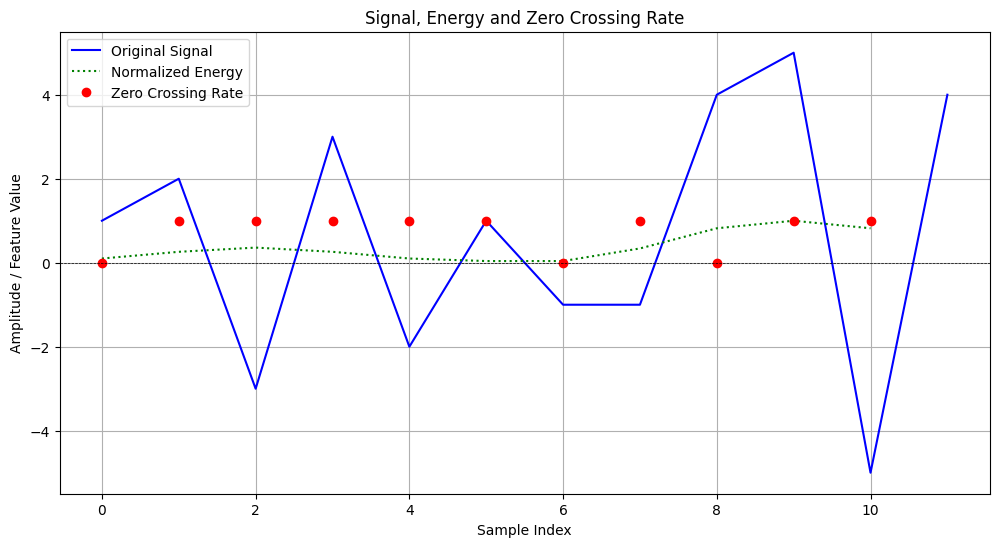

In [55]:
import matplotlib.pyplot as plt

def plot_combined(signal, energy, zcr):
    plt.figure(figsize=(12, 6))
    plt.plot(signal, label='Original Signal', color='blue')
    plt.plot(energy, label='Normalized Energy', color='green', linestyle='dotted')
    plt.plot(range(len(zcr)), zcr, label='Zero Crossing Rate', color='red', marker='o', linestyle='None')
    plt.title('Signal, Energy and Zero Crossing Rate')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude / Feature Value')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.grid()
    plt.legend()
    plt.show()

normalized_energy = [e / max(raw_energy(f)) for e in raw_energy(f)]
plot_combined(s, normalized_energy, zero_crossing_rate(f))


**Author:** Matheus Sinto Novaes <br>
**E-mail:** matheus.sinto@unesp.br

**Course:** Digital Speech Processing <br>
**Professor:** Dr. Eng. Rodrigo Capobianco Guido <br>
**Date:** June 12 2025
